In [8]:
%matplotlib inline
from matplotlib import pyplot as plt, colors
import seaborn as sns

In [3]:
import h5py
import numpy as np
from astropy.units import deg
#from lenstools import GaussianNoiseGenerator, ConvergenceMap
from scipy.ndimage import gaussian_filter

This notebook fill host the plots for maps and similar statistics for the paper. The plots in the queue are:
* Example fields for a few cosmologies, showing orig and noiased + smooths maps 
* Adv examples (show a few in the main paper, maybe have some in appendix)
* Clones, both images and their properties vs training samples and GRFs

In [4]:
orig_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTraining.hdf5'
grf_fname = '/home/users/swmclau2/oak/Uatu/UatuFastPMTraining/UatuFastPMTrainingGRF_smooth_1.0_noise_0.3.hdf5'
#clone_fname = '/home/users/swmclau2/oak/Uatu/UatuLightconeTraining/UatuLightconeTrainingRobustifyDeepResnetAdvGRF.hdf5'

In [5]:
smooth = 1
noise = 0.29#29
shape_noise = noise/np.sqrt((2.34**2)*30) #sigma_e/sqrt(A*n)
np.random.seed(0)
data_mod = lambda x: gaussian_filter(x+np.random.randn(*x.shape)*shape_noise, smooth)#+1.0)

In [131]:
def plot_field(orig_fname, data_mod, boxno, idx, axes = None):
    if axes is None:
        fig, axes = plt.subplots(1,2, figsize = (12,6))
    with h5py.File(orig_fname, 'r') as f:
        Emean, std = f.attrs['mean'], f.attrs['std']
        X = f[boxno]['X'][idx, :].squeeze()
        Y = f[boxno]['Y'][idx,:].squeeze()
        #X1 = (X1-mean)/std
    #X = X-X.min()+1e-6
    #print X.min(), X.max()
    norm = colors.SymLogNorm(vmin=-0.01, vmax=0.04, linthresh= 0.005, linscale = 1.0)
    axes[0].imshow(X, norm=norm, extent=[0,10,0,10])
    #axes[0].axis('off')
    im = axes[1].imshow(data_mod(X), norm = norm,extent=[0,10,0,10])
    #axes[1].axis('off')
    print Y
    #plt.suptitle(r'($\Omega_m$, $\sigma_8$) = (%0.2f, %0.2f)'%(Y[0], Y[1]), fontsize = 20) 
    #plt.tight_layout()
    #fig.colorbar(im, ax=axes.ravel().tolist())
    return im

[ 0.258239  1.097992]
[ 0.242576  0.710442]


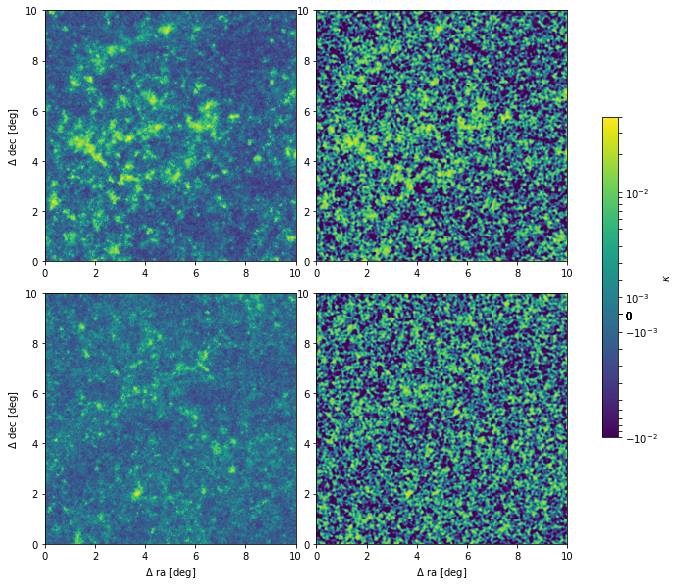

In [137]:
fig, axes = plt.subplots(2,2, figsize = (10,8))#, sharex=True, sharey=True)
for a, boxno, idx in zip(axes, [100, 64], [32, 801]):
    im = plot_field(orig_fname, data_mod, 'Box%03d'%boxno, idx, axes=a)
plt.tight_layout()
fig.colorbar(im, ax=axes.ravel().tolist(), shrink = 0.6, label = r'$\kappa$')

for i in xrange(2):
    axes[1][i].set_xlabel(r'$\Delta$ ra [deg]')
    axes[i][0].set_ylabel(r'$\Delta$ dec [deg]')


#plot_field(orig_fname, data_mod, 'Box064', 801)